## Making the Dataframes We Need for Analyses


In [1]:
import numpy as np
import pickle
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../utils"))
sys.path.append(os.path.abspath(".."))

import deepsz_main as dutils

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
#import colorcet as cc
import utils2 as utils
from importlib import reload
import global_settings as sgs

reload(utils)



#change data_path to the location where you tore all the detectron results 
#the scructure here for example should be Data/deepsz/detectron_tmp_output/{experiment_name}
PytorchResults = utils.PytorchResultReader()

df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
if not os.path.isdir('./pics'): os.makedirs('./pics')

## Show IR/Radio Galaxies examples

In [2]:

Obj = dutils.CutoutGen(use_big=False,MULTIPLE=None) 

master_df = Obj.get_df_with_halo_info().reset_index().rename(columns={"map_%s"%s:'cutout_%s'%s for s in ['ra','dec']})
pos_df = master_df[master_df['y']]
neg_df = master_df[~master_df['y']]

get_x_func_skymap = None
get_x_func_skymap = lambda x: Obj.get_cutout(x, read=True, component='skymap') #Uncomment if you have the maps generated

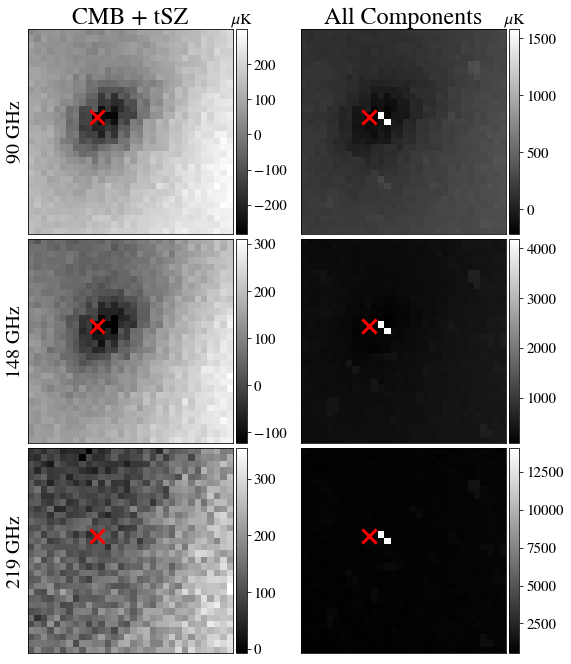

In [3]:
nth_largest=200
reload(utils)
irs = dutils.match_IR().rename(columns={"obj_ra":"CL_ra", "obj_dec":"CL_dec", 'map_ra':"cutout_ra",'map_dec':'cutout_dec'})
#print(irs.iloc[nth_largest], irs.head())
utils.show_cutout_full(irs.iloc[nth_largest], lambda c: Obj.get_cutout(irs.iloc[nth_largest]['cutout_id'], c, read=True), 
                       #save_path='./pics/high_flux_ir_sample_cutout.pdf', 
                       components = ['samples', 'dust'], #comment this line to generate all components (columns)
                       override_name_map={"dust":"All Components"},
                       separate_cbar='each', mark=True, font=20)

# Showing Cutouts
## Skymap (full components)

False True


Z:\gitRes\deepsz_public\deepsz\utils\utils2.py:911: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  cbar = cplt.cax.colorbar(im, norm=norm)
C:\Users\zhen7\.conda\envs\deepsz\lib\site-packages\mpl_toolkits\axes_grid1\axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


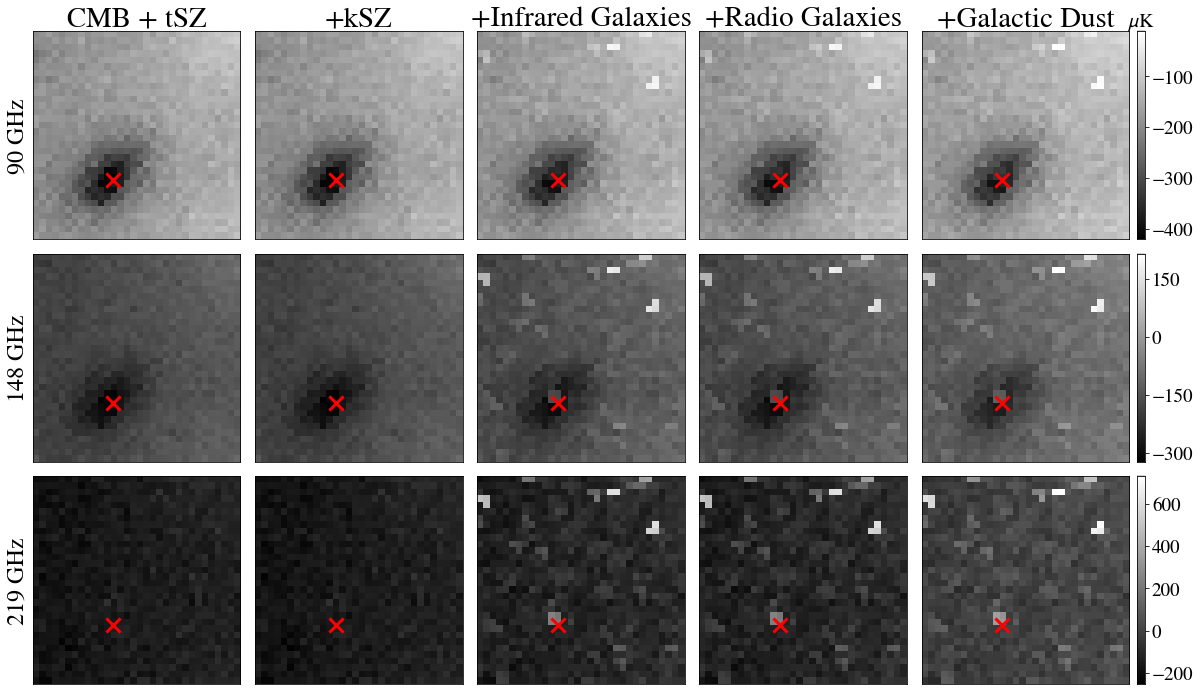

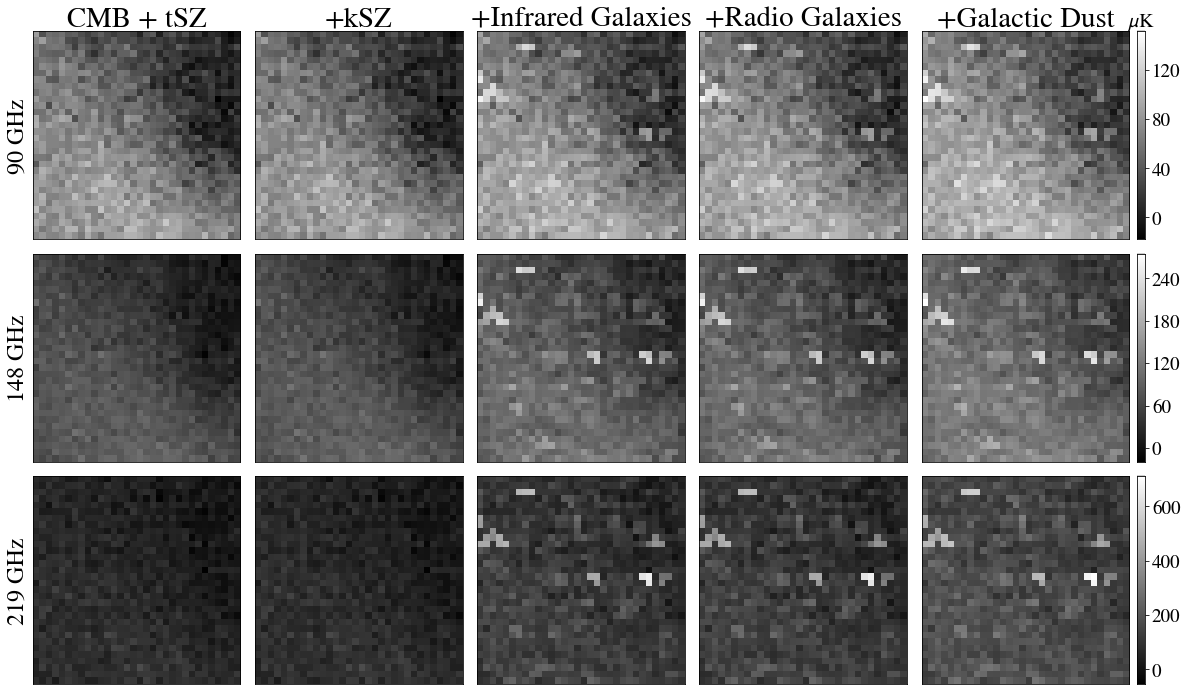

In [4]:
reload(utils)
print(neg_df.loc[3].y, pos_df.loc[104].y) #3 is negative, 104 is positive

#positive cutout example
utils.show_cutout_full(pos_df.loc[104], lambda c: Obj.get_cutout(104, c, read=True), 
                       #save_path='./pics/pos_sample_cutout.pdf',
                       separate_cbar='row', width_multiple=1.05)

#negative cutout example
utils.show_cutout_full(neg_df.loc[3], lambda c: Obj.get_cutout(3, c, read=True), 
                       #save_path='./pics/neg_sample_cutout.pdf',
                       separate_cbar='row', width_multiple=1.05, mark=False)

# Training 

Rolling_window = 100
Rolling_window = 100
Rolling_window = 100


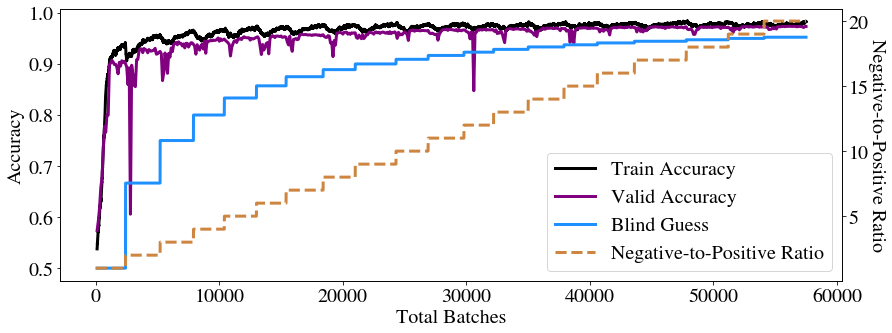

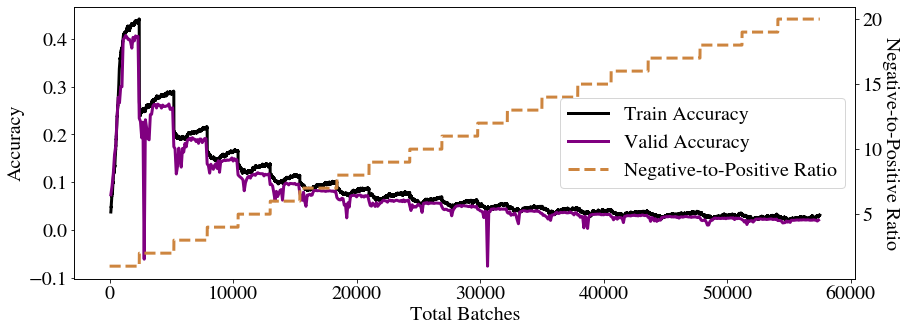

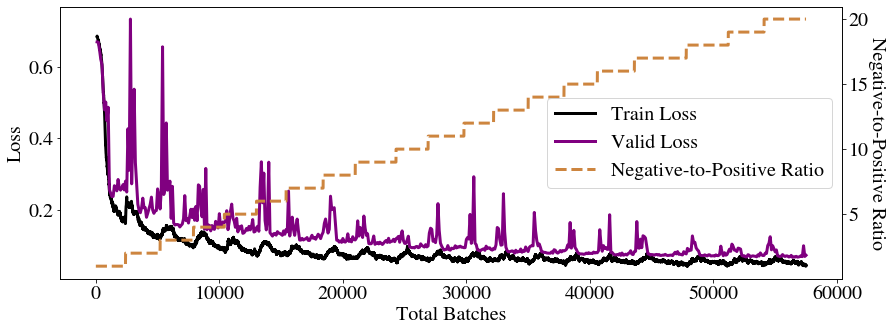

In [5]:
res = PytorchResults._read_one(PytorchResults.exp_names[0])
reload(utils)
utils.plot_training_process(res[0], res[2], 'acc',
                            #save_path='./pics/CNN_acc_hist.pdf',
                            font=20,
                           )
utils.plot_training_process(res[0], res[2], 'acc_adj',
                            #save_path='./pics/CNN_acc_adj_hist.pdf',
                            font=20)
utils.plot_training_process(res[0], res[2], 'loss',
                            #save_path='./pics/CNN_loss_hist.pdf',
                            font=20)

In [6]:
res

({'test':          acc      loss        F1  F1_thres
  0   0.905822  0.231308  0.537477  0.956306
  1   0.967153  0.074396  0.577461  0.874918
  2   0.940731  0.130940  0.589528  0.915612
  3   0.976144  0.057347  0.584058  0.813878
  4   0.962572  0.081121  0.574093  0.874918
  5   0.972780  0.061401  0.594132  0.834224
  6   0.976486  0.054017  0.598566  0.813878
  7   0.980155  0.048326  0.597519  0.712143
  8   0.977104  0.053327  0.605128  0.813878
  9   0.973179  0.059439  0.596313  0.793531
  10  0.977836  0.049121  0.602570  0.732490
  11  0.976971  0.051215  0.598303  0.712143
  12  0.980060  0.046401  0.597508  0.752837
  13  0.978901  0.048225  0.591383  0.752837
  14  0.978378  0.050442  0.587388  0.712143
  15  0.981191  0.044552  0.600267  0.712143
  16  0.981020  0.044426  0.600257  0.712143
  17  0.983358  0.040067  0.601812  0.630755
  18  0.982997  0.041578  0.607306  0.610408
  19  0.984508  0.039166  0.601246  0.549367,
  'val_ret':          acc      loss        F1 

## CNN Performance

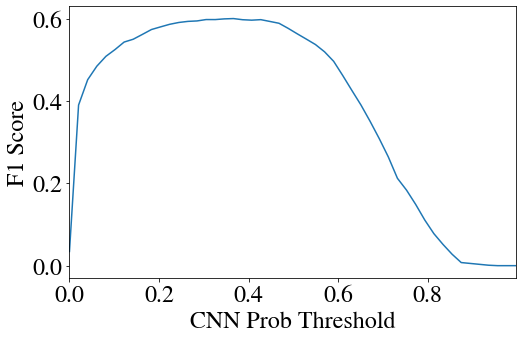

(0.36624489795918364, 0.600153491941673)
TP: 1118, FP:780, TN:102558, FN:727
TP=1118; FP=780; TN=102558; FN=727; precision=0.589041095890411;recall=0.6059620596205962


0.5973817793213999

In [7]:
df =  pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
reload(utils)
cnn_result = PytorchResults.get_best()[0]
#val_F1_thres = cnn_result['stat']['F1_thres']
print(utils.get_F1(df[df['which'] == 'test']['pred'], df[df['which'] == 'test']['y']))#, save_path='./pics/split2_val_F1.png'))
xcnn, ycnn = utils.get_F1(df[df['which'] == 'valid']['pred'], df[df['which'] == 'valid']['y'], plot=False, get_raw=True)
val_F1_thres,_ = utils.get_F1(df[df['which'] == 'valid']['pred'], df[df['which'] == 'valid']['y'], plot=False, get_raw=False)
utils._get_Fbeta(df[df['which'] == 'test']['y'], df[df['which'] == 'test']['pred'] > val_F1_thres, debug=True)

## MF Performance

In [8]:
data_dir='../data/'
cat_mf = np.load(data_dir + '2048.25_3sigma_catalog.npz') # MF output
col_map = [("mf_peaksig","significance"),("mf_dec","dec"), ("mf_ra","ra")]
mf_df = pd.DataFrame({k1:cat_mf[k2].byteswap().newbyteorder() for k1, k2 in col_map}).reindex(columns=[x[0] for x in col_map])
mfhalo_df = utils.match(mf_df, 1)

In [9]:
mfhalo_df = utils.match(pd.DataFrame([[3.01]],columns=["mf_peaksig"]), 1) #hack: it will read the cache regardless of input (if the cache exsits)
mfhalo_df.head()

,M500,Mvir,StoN,dec_halo,halo_id,mf_dec,mf_id,mf_ra,ra_halo,redshift
0,1.182203e+13,2.277903e+13,3.002129,3.020151,622176.0,3.016666,455664.0,45.883808,45.887710,0.9072
1,2.518189e+13,3.671557e+13,3.002475,74.968570,790338.0,74.974998,455662.0,5.947196,5.928547,1.0622
2,5.334331e+13,9.342287e+13,3.002842,17.435050,175902.0,17.427086,455661.0,72.919884,72.920840,0.4853
3,2.816142e+13,5.084434e+13,3.003431,48.861270,365349.0,48.852081,455659.0,12.953123,12.932410,0.6786
4,1.941504e+13,2.748862e+13,3.003459,13.223440,438267.0,13.212502,455658.0,82.271370,82.283220,0.7494


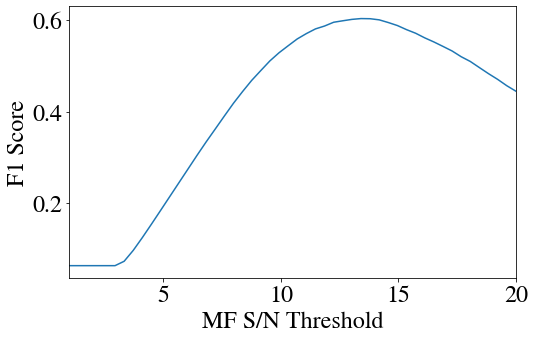

TP: 1133, FP:729, TN:102609, FN:712
TP=1133; FP=729; TN=102609; FN=712; precision=0.6084854994629431;recall=0.6140921409214092
Val F1: 0.6032428355957767, test F1: 0.6112759643916914, threshold: 13.408163265306122


In [10]:
reload(utils)
mfhalo_df = utils.match(pd.DataFrame([[3.01]],columns=["mf_peaksig"]), 1) #hack the cache
mfhalo_val = mfhalo_df[mfhalo_df['mf_ra'] > 0.13 * 90]
y_mf = (mfhalo_val.Mvir > 2e14) & (mfhalo_val.redshift > 0.25)
mf_thres, mf_val_F1 = utils.get_F1(mfhalo_val['StoN'].fillna(2.), y_mf, xlim=(1,20),method='mf')#,save_path='./pics/split2_val_F1_MF.pdf')
xmf, ymf = utils.get_F1(mfhalo_val['StoN'].fillna(2.), y_mf, xlim=(1,20),method='mf',get_raw=True, plot=False)
mf_F1 = utils._get_Fbeta(df[df['which']=='test']['y'], df[df['which']=='test']['StoN'] > mf_thres, debug=True)
print("Val F1: {}, test F1: {}, threshold: {}".format(mf_val_F1, mf_F1, mf_thres))

## Compare

<AxesSubplot:>

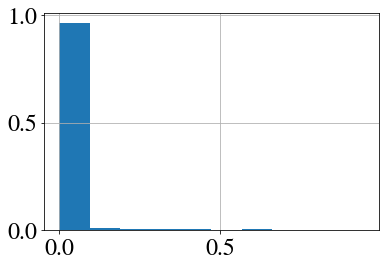

In [11]:
df['pred'].hist(weights = np.ones_like(df.index) / len(df.index))
#CNN's prediction is mostly close to 0

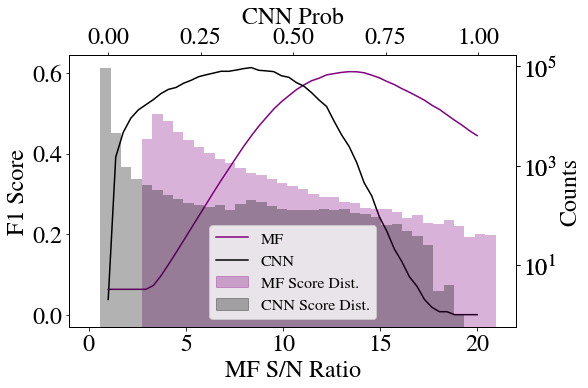

In [12]:
reload(utils)
utils.stack_F1(xmf,ymf,xcnn,ycnn,
               #save_path='./pics/split2_stackF1_calibrated.pdf', 
               hist={"MF":df[df['which']=='test']['StoN'].values, "CNN":df[df['which']=='test']['pred'].values}, nxbins=40)

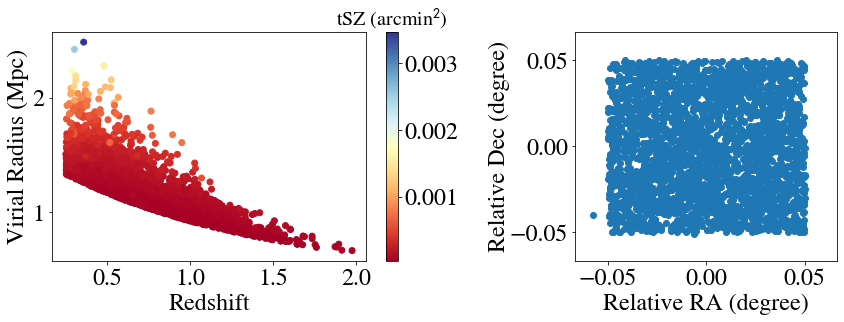

In [13]:
reload(utils)
df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
df = df.rename(columns={'map_%s'%c:"cutout_%s"%c for c in ['ra', 'dec']})

utils.plot_all(df,
               #save_path='./pics/fullfeatures_split2.png',
              )

Sampling cutouts such that CNN prob in (0.0,0.209), MF S/N in (15.4, 100), has halo
there are 89 such cutouts 
Cutout 63233 has features: Mvir=2.2e+14 redshift=1.0201 rvir=0.9386059
Cutout 91105 has features: Mvir=2.3e+14 redshift=0.9477 rvir=0.9858138
Cutout 15690 has features: Mvir=2.5e+14 redshift=0.7166 rvir=1.133127
Cutout 92685 has features: Mvir=2.8e+14 redshift=0.8449 rvir=1.104672
Cutout 86690 has features: Mvir=2.2e+14 redshift=1.0161 rvir=0.9376507


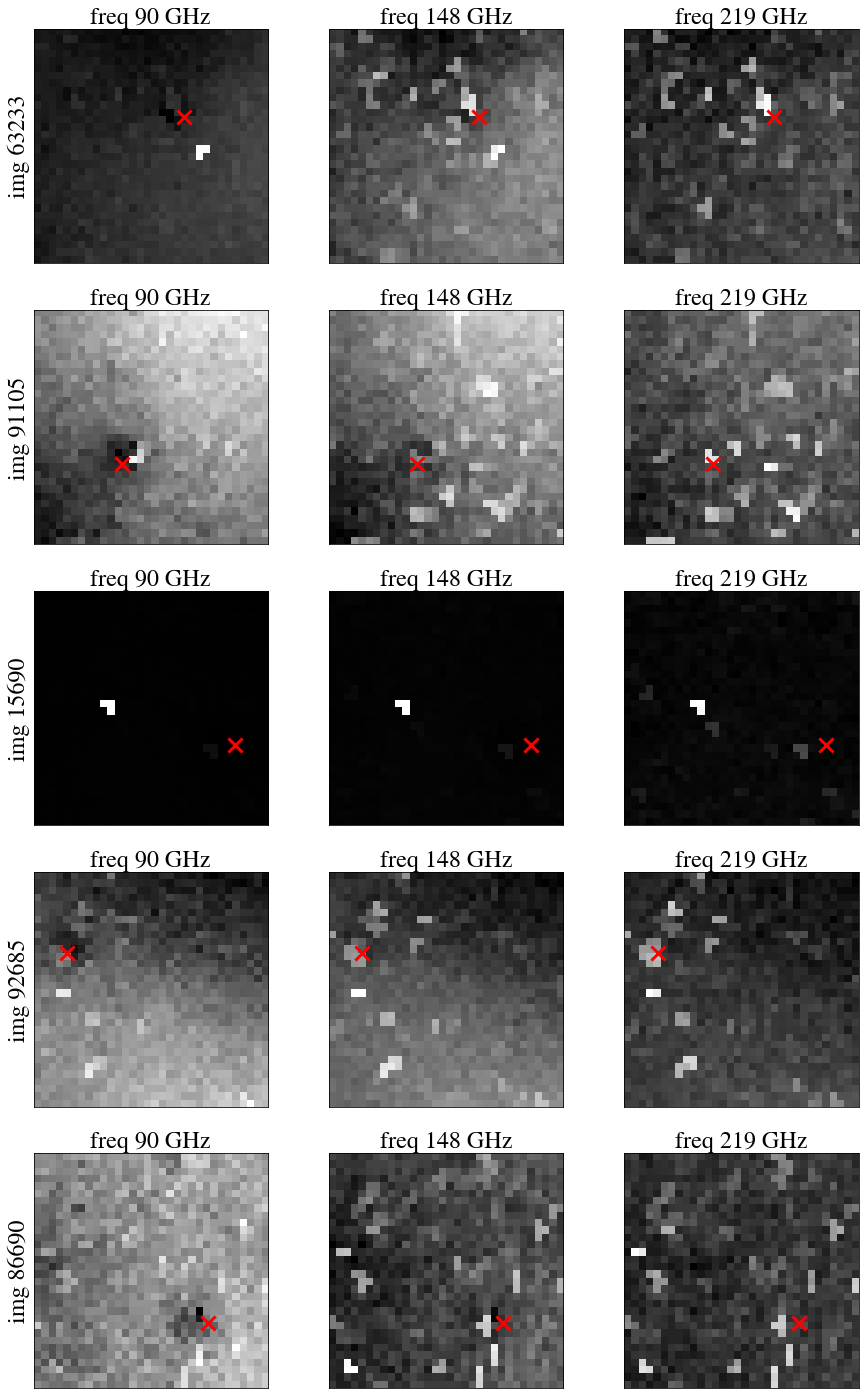

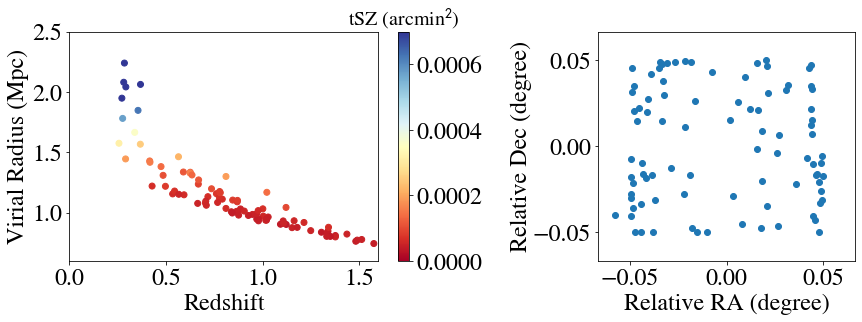

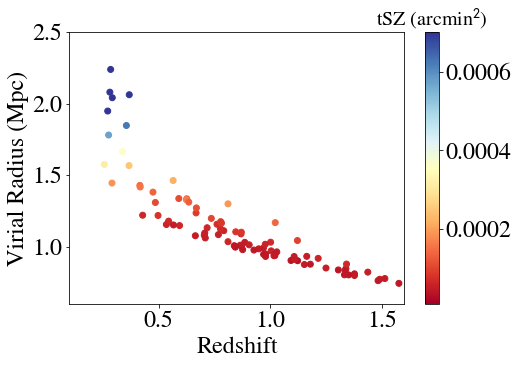

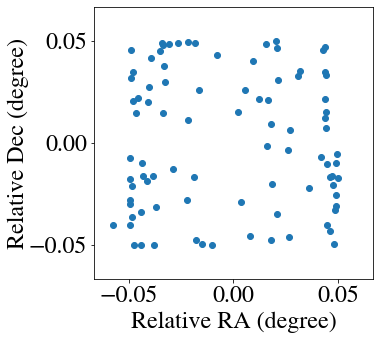

In [14]:
reload(utils)
df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL).reset_index()
df = df.rename(columns={'map_%s'%c:"cutout_%s"%c for c in ['ra', 'dec']})

#tdf = utils.show_range(df[df['which']=='test'], get_x_func_skymap, cnn_prob=(0.0, 0.5), mf_sn=(15.4, 100),  #0.5 is for uncalibrated
tdf = utils.show_range(df[df['which']=='test'], get_x_func_skymap, cnn_prob=(0.0, 0.209), mf_sn=(15.4, 100), 
                       #save_path='./pics/CNNfailures_examplecutouts_split2.png'
                      )
utils.plot_all(tdf, ranges={"rvir": (0.6, 2.5), 'redshift': (0, 1.6), 'tSZ': (0, 7e-4)}
               #save_path='./pics/CNNfailures_split2.pdf'
              )
plt.figure(figsize=(7.5,5))
utils.plot_features(tdf, ranges={"rvir": (0.6, 2.5), 'redshift': (0.1, 1.6), 'tSZ': (1e-5, 7e-4)})
#plt.savefig('./pics/CNNfailures_split2_a.pdf', dpi=500, bbox_inches="tight")
plt.figure(figsize=(5,5))
utils.plot_relative_loc(tdf)
#plt.savefig('./pics/CNNfailures_split2_b.pdf', dpi=500, bbox_inches="tight")

Sampling cutouts such that CNN prob in (0.47,1.0), MF S/N in (3.0, 11.3), has halo
there are 86 such cutouts 
Cutout 39114 has features: Mvir=2.3e+14 redshift=0.4766 rvir=1.232963
Cutout 73983 has features: Mvir=2.9e+14 redshift=0.5752 rvir=1.276524
Cutout 84316 has features: Mvir=2.1e+14 redshift=0.2562 rvir=1.339485
Cutout 55930 has features: Mvir=2.4e+14 redshift=0.5752 rvir=1.19123
Cutout 49774 has features: Mvir=2.9e+14 redshift=0.4032 rvir=1.382407


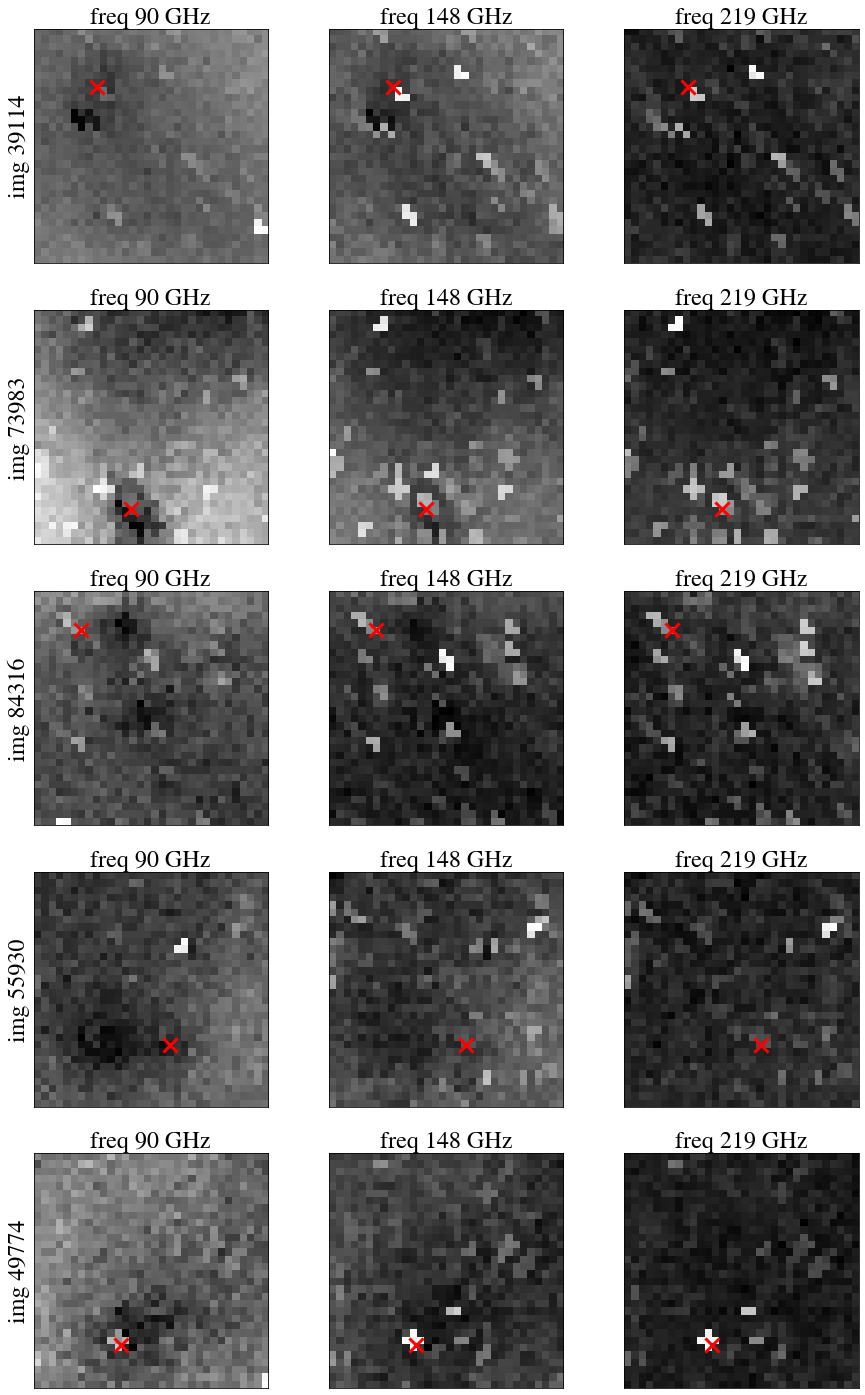

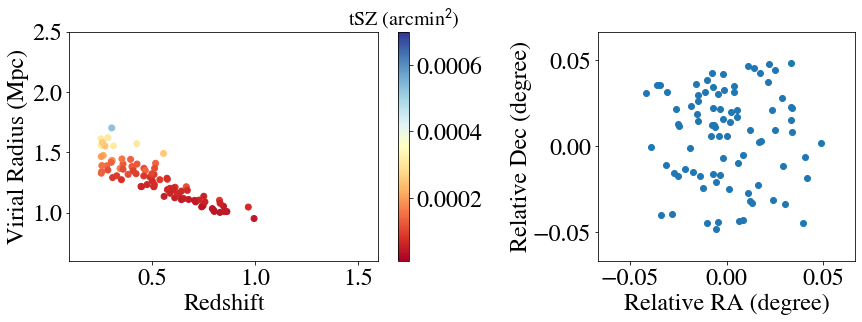

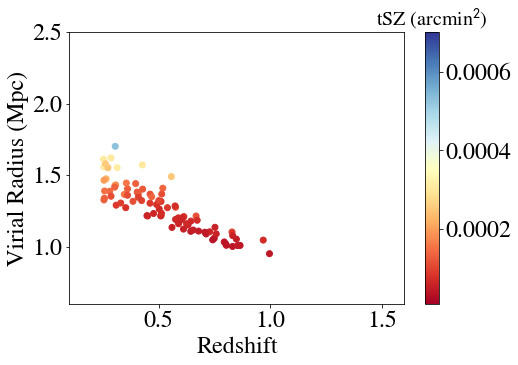

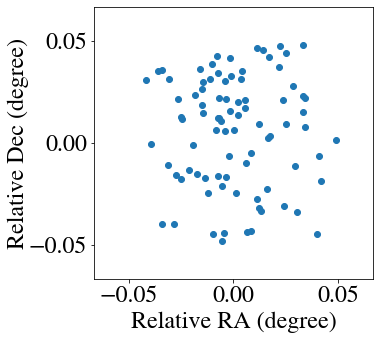

In [15]:
reload(utils)
df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL).reset_index()
df = df.rename(columns={'map_%s'%c:"cutout_%s"%c for c in ['ra', 'dec']})

#tdf = utils.show_range(df[df['which']=='test'], get_x_func_skymap, cnn_prob=(0.8, 1.), mf_sn=(3., 11.3), #0.8 is for uncalibrated
tdf = utils.show_range(df[df['which']=='test'], get_x_func_skymap, cnn_prob=(0.47, 1.), mf_sn=(3., 11.3),
                       #save_path='./pics/MFfailures_examplecutouts_split2.png'
                      )
utils.plot_all(tdf, ranges={"rvir": (0.6, 2.5), 'redshift': (0.1, 1.6), 'tSZ': (1e-5, 7e-4)},
               #save_path='./pics/MFfailures_split2.pdf'
              )

plt.figure(figsize=(7.5,5))
utils.plot_features(tdf, ranges={"rvir": (0.6, 2.5), 'redshift': (0.1, 1.6), 'tSZ': (1e-5, 7e-4)})
#plt.savefig('./pics/MFfailures_split2_a.pdf', dpi=500, bbox_inches="tight")
plt.figure(figsize=(5,5))
utils.plot_relative_loc(tdf)
#plt.savefig('./pics/MFfailures_split2_b.pdf', dpi=500, bbox_inches="tight")

## More dist-pred relation ship (sample more random shifts)


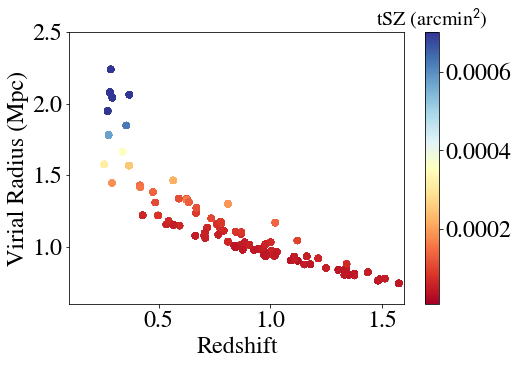

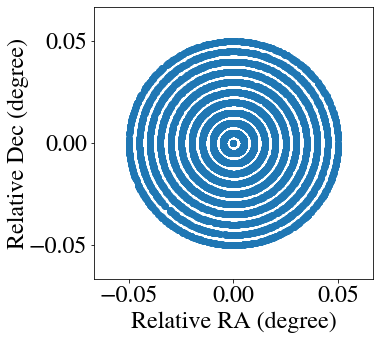

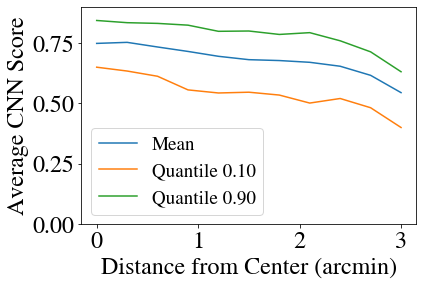

In [16]:
reload(utils)
new_obj = dutils.ShiftBadCNNGenCutout(2)
df = new_obj.df
pred = pd.read_pickle(os.path.join(sgs.VARYING_DIST_DATA_PATH, 'pred.pkl'))
df['pred'] = pred['y_pred']
df['cutout_id'] = df.index

plt.figure(figsize=(7.5,5))
utils.plot_features(df, ranges={"rvir": (0.6, 2.5), 'redshift': (0.1, 1.6), 'tSZ': (1e-5, 7e-4)})
#plt.savefig('./pics/split2_CNN_failures_shifted_a.pdf', dpi=500, bbox_inches="tight")
plt.figure(figsize=(5,5))
utils.plot_relative_loc(df)
#plt.savefig('./pics/split2_CNN_failures_shifted_b.pdf', dpi=500, bbox_inches="tight")
res = utils.plot_pred_vs_dist_with_errorbar(df, 
                                            #save_path="./pics/split2_pred_vs_dist_werrorbar.pdf"
                                           )

# Ensemble

In [17]:
reload(utils)
df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
df = df.rename(columns={'map_%s'%c:"cutout_%s"%c for c in ['ra', 'dec']})

(0.2571428571428572, 7.938775510204081) 0.6942909760589319
TP: 1283, FP:625, TN:102713, FN:562
TP=1283; FP=625; TN=102713; FN=562; precision=0.6724318658280922;recall=0.6953929539295393


0.6837196909139355

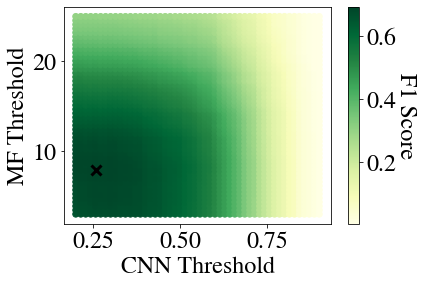

In [18]:
from importlib import reload
reload(utils)
thresAND, best_F1 = utils.get_F1_CNN_and_MF(df[df['which']=='valid'],col_mf='StoN', col_cnn='pred', 
                                            mass_thresh='2e14',col_label='y', method='and',
                                            #save_path = './pics/split2_AND_Ensemble_calibrated.pdf',
                                           )
print(thresAND, best_F1)
cnn_pred = df[df['which'] =='test']['pred'] > thresAND[0]
mf_pred = df[df['which'] =='test']['StoN'] > thresAND[1]
utils._get_Fbeta(df[df['which']=='test']['y'].values, cnn_pred & mf_pred, debug=True)

#This might have used a different grid

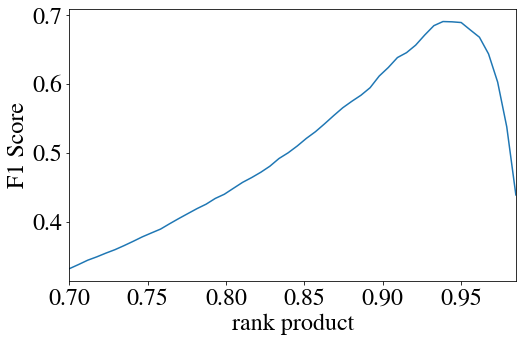

0.938469387755102 0.6908315565031983
MF alone threshold percentile: 0.9816462736373749
CNN alone threshold percentile 0.9798603386478804
joint threshold percentile 0.977420305562686
TP: 1429, FP:946, TN:102392, FN:416
TP=1429; FP=946; TN=102392; FN=416; precision=0.6016842105263158;recall=0.7745257452574525


0.6772511848341233

In [19]:
from importlib import reload
reload(utils)
tdf = df.reindex()
tdf['StoN'] = tdf['StoN'].fillna(2.) #Recently added
thresPROD, F1 = utils.get_F1_CNN_and_MF(tdf[tdf['which']=='valid'],col_mf='StoN', col_cnn='pred', 
                                        mass_thresh='2e14',col_label='y', method='rankproduct',
                                        #save_path = './pics/split2_rankproduct_Ensemble_calibrated.pdf'
                                       )
print(thresPROD, F1)
tdf = tdf[tdf['which'] =='test']
cnn_pred = tdf['pred'].rank() / float(tdf['pred'].count())
mf_pred = tdf['StoN'].rank() / float(tdf['StoN'].count())
print("MF alone threshold percentile:", (df['StoN'].fillna(2.) < 13.4).sum() / len(df))
print("CNN alone threshold percentile", (df['pred'] < 0.367).sum() / len(df))
print("joint threshold percentile", (cnn_pred * mf_pred < thresPROD).sum() / len(tdf))
utils._get_Fbeta(tdf['y'].values, (cnn_pred * mf_pred > thresPROD), debug=True)

## CNN Performance by components

In [20]:
df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
print(df.shape, df.count())
df.head()

(161820, 25) map_ra_idx       161820
map_dec_idx      161820
map_ra           161820
map_dec          161820
which            161820
y                161820
halo_id            2934
pred_samples     161820
redshift           2934
tSZ                2934
Mvir               2934
rvir               2934
CL_ra              2934
CL_dec             2934
pred_ksz         161820
pred_ir_pts      161820
pred_rad_pts     161820
pred_dust        161820
pred_skymap      161820
pred             161820
mf_ra             67850
mf_dec            67850
StoN              67850
pos_dist2edge      2934
neg_dist2edge     11261
dtype: int64


,map_ra_idx,map_dec_idx,map_ra,map_dec,which,y,halo_id,pred_samples,redshift,tSZ,...,pred_ir_pts,pred_rad_pts,pred_dust,pred_skymap,pred,mf_ra,mf_dec,StoN,pos_dist2edge,neg_dist2edge
cutout_id,,,,,,,,,,,,,,,,,,,,,
32443,36,79,3.666667,7.966667,test,False,NaN,0.000830,NaN,NaN,...,0.000598,0.000383,0.000568,0.000805,0.000805,3.688043,7.916668,3.000670,NaN,0.014216
35114,39,53,3.966667,5.366667,test,False,NaN,0.001966,NaN,NaN,...,0.000710,0.000427,0.000812,0.001445,0.001445,3.971405,5.402084,3.001362,NaN,NaN
138750,154,304,15.466667,30.466667,valid,False,NaN,0.000837,NaN,NaN,...,0.000330,0.000572,0.000693,0.000695,0.000695,15.452891,30.504168,3.005630,NaN,NaN
85258,94,752,9.466667,75.266667,test,False,NaN,0.001131,NaN,NaN,...,0.000320,0.000567,0.000771,0.000888,0.000888,9.417761,75.256248,3.006363,NaN,NaN
28911,32,143,3.266667,14.366667,test,False,NaN,0.001296,NaN,NaN,...,0.000373,0.000783,0.000663,0.000751,0.000751,3.280707,14.372918,3.007119,NaN,NaN


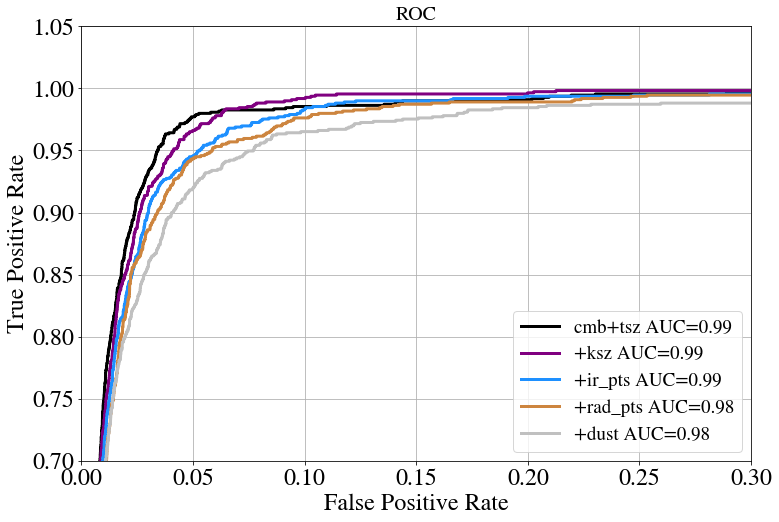

TP: 1319, FP:928, TN:102410, FN:526
TP=1319; FP=928; TN=102410; FN=526; precision=0.5870048954161103;recall=0.7149051490514905
cmb+tsz - F1:0.644672531769306, thres=0.32448979591836735
TP: 1281, FP:933, TN:102405, FN:564
TP=1281; FP=933; TN=102405; FN=564; precision=0.5785907859078591;recall=0.6943089430894309
+ksz - F1:0.631189948263119, thres=0.3857142857142857
TP: 1200, FP:895, TN:102443, FN:645
TP=1200; FP=895; TN=102443; FN=645; precision=0.5727923627684964;recall=0.6504065040650406
+ir_pts - F1:0.6091370558375635, thres=0.3857142857142857
TP: 1227, FP:991, TN:102347, FN:618
TP=1227; FP=991; TN=102347; FN=618; precision=0.5532010820559062;recall=0.6650406504065041
+rad_pts - F1:0.6039872015751908, thres=0.36530612244897953
TP: 1119, FP:730, TN:102608, FN:726
TP=1119; FP=730; TN=102608; FN=726; precision=0.6051919956733369;recall=0.6065040650406504
+dust - F1:0.6058473199783432, thres=0.42653061224489797


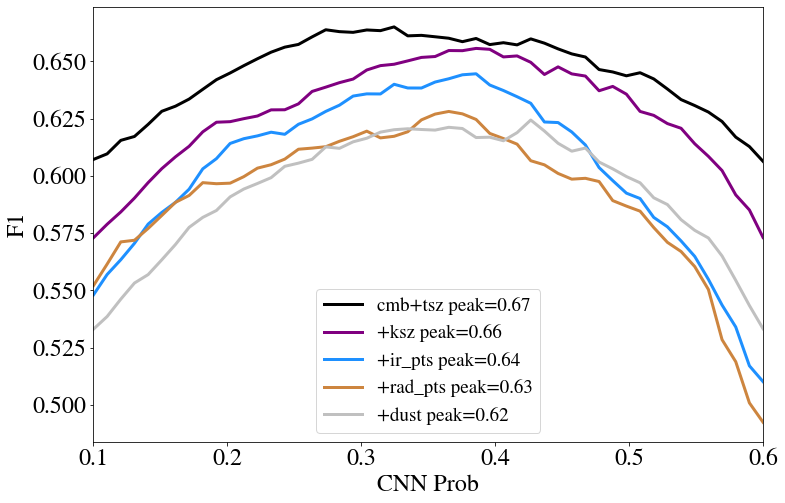

In [21]:
reload(utils)
dfs_ = {k: df[df['which'] == k] for k in ['valid', 'test']}
y_ = {k: dfs_[k].y for k in dfs_.keys()}
y_preds_ = {k: {"cmb+tsz":dfs_[k]['pred_samples'], 
               "+ksz":dfs_[k]['pred_ksz'], 
               "+ir_pts":dfs_[k]['pred_ir_pts'], 
               "+rad_pts":dfs_[k]['pred_rad_pts'],
               "+dust":dfs_[k]['pred_dust']} for k in dfs_.keys()}

y_val = df[df['which'] == 'valid'].y
y_preds_val = {"cmb+tsz":df[df['which'] == 'valid']['pred_samples'], 
               "+ksz":df[df['which'] == 'valid']['pred_ksz'], 
               "+ir_pts":df[df['which'] == 'valid']['pred_ir_pts'], 
               "+rad_pts":df[df['which'] == 'valid']['pred_rad_pts'],
               "+dust":df[df['which'] == 'valid']['pred_dust']}
utils.plot_rocs(y_['valid'], y_preds_['valid'], 
                #save_path='./pics/split2_components_ROC_calibrated.pdf'
               )
thresholds = utils.plot_F1s(y_val, y_preds_val, 
               #save_path='./pics/split2_components_F1_calibrated.pdf',
               y_test=y_['test'], pred_test=y_preds_['test'],
               xlim=(0.1, 0.6)
              )

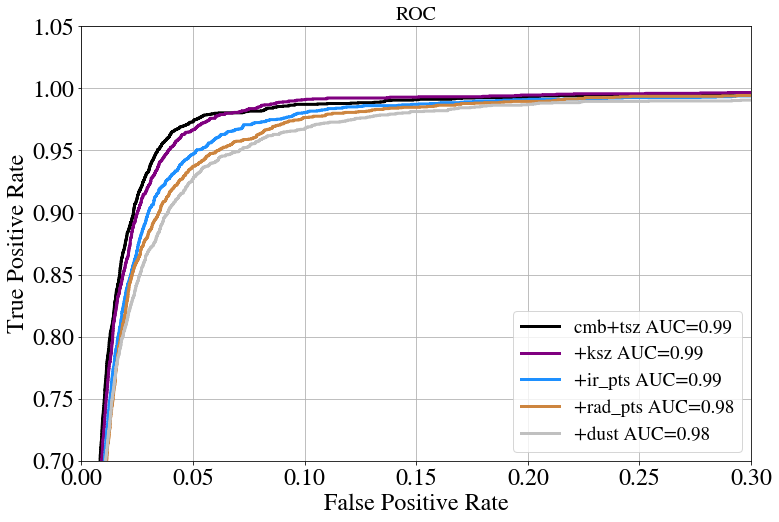

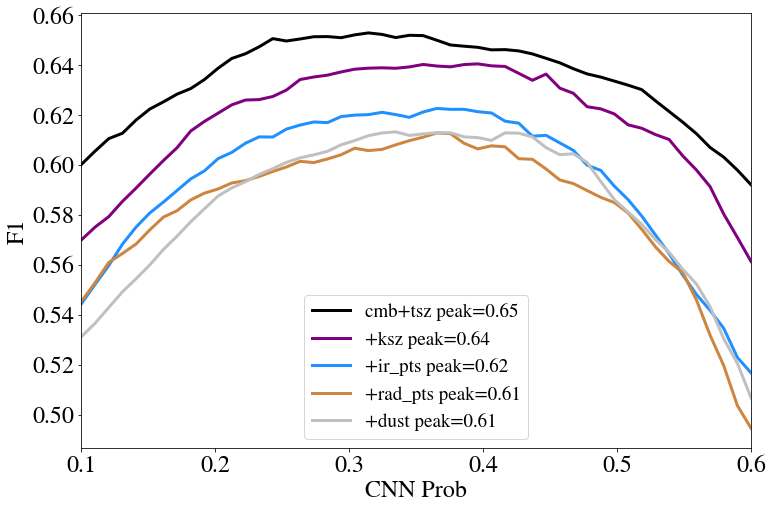

{'cmb+tsz': 0.3142857142857143,
 '+ksz': 0.39591836734693875,
 '+ir_pts': 0.36530612244897953,
 '+rad_pts': 0.36530612244897953,
 '+dust': 0.3346938775510204}

In [22]:
reload(utils)
y_all = df.y
y_preds_all = {"cmb+tsz":df['pred_samples'], 
               "+ksz":df['pred_ksz'], 
               "+ir_pts":df['pred_ir_pts'], 
               "+rad_pts":df['pred_rad_pts'],
               "+dust":df['pred_dust']}
utils.plot_rocs(y_all, y_preds_all)
utils.plot_F1s(y_all, y_preds_all, xlim=(0.1, 0.6))

## Proportion of cutouts tagged

In [23]:
thresholds

{'cmb+tsz': 0.32448979591836735,
 '+ksz': 0.3857142857142857,
 '+ir_pts': 0.3857142857142857,
 '+rad_pts': 0.36530612244897953,
 '+dust': 0.42653061224489797}

Z:\gitRes\deepsz_public\deepsz\utils\utils2.py:1737: RuntimeWarning: divide by zero encountered in true_divide
  sc = cplt.pcolormesh(_mid(xbins), _mid(ybins), ((ccounts * 100.0) / totalcounts).T, cmap='Greens', vmin=0., vmax=100.)
Z:\gitRes\deepsz_public\deepsz\utils\utils2.py:1737: RuntimeWarning: invalid value encountered in true_divide
  sc = cplt.pcolormesh(_mid(xbins), _mid(ybins), ((ccounts * 100.0) / totalcounts).T, cmap='Greens', vmin=0., vmax=100.)
Z:\gitRes\deepsz_public\deepsz\utils\utils2.py:1737: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc = cplt.pcolormesh(_mid(xbins), _mid(ybins), ((ccounts * 100.0) / totalcounts).T, cmap='Greens', vmin=0., vmax=100.)


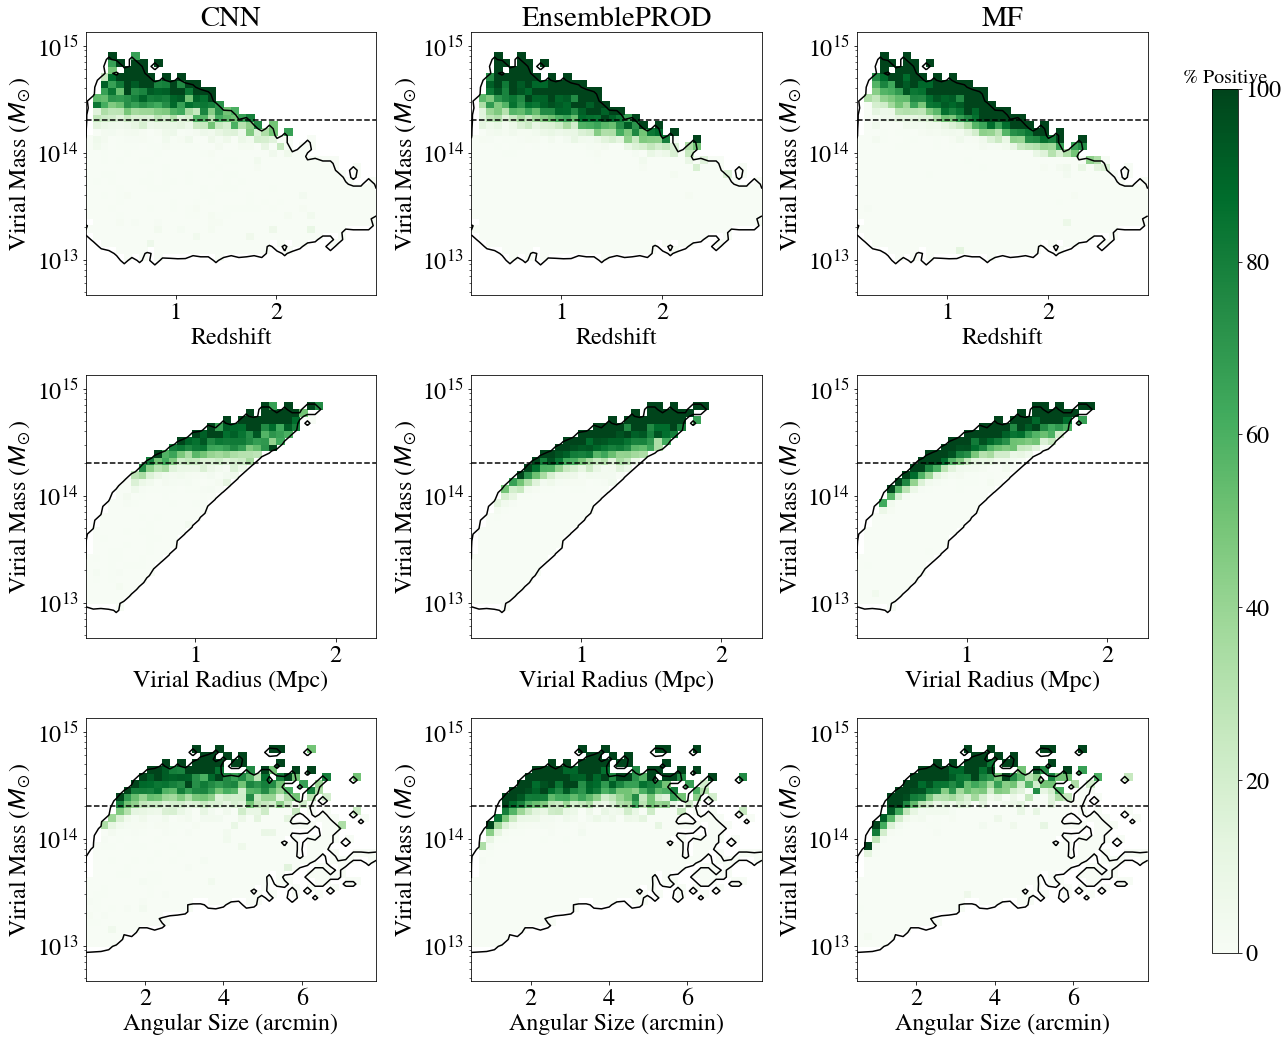

In [24]:
reload(utils)
#Original
df = utils.make_full_testdf(True)
#df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
df['pred_MF'] = df['StoN']
df['pred_EnsembleAND'] = df['EnsembleAND_pred'].astype(float)
df['pred_EnsemblePROD'] = df['EnsemblePROD']

CNN_thresholds = {"samples":thresholds['cmb+tsz'], 'skymap':0.36624489795918364
                 }
for _k in ['ksz', 'ir_pts', 'rad_pts', 'dust']: CNN_thresholds[_k] = thresholds['+'+_k]
MF_thresholds = {"MF": 13.408163265306122}
Ensemble_thresholds = {#"EnsembleAND": 0.999,#has to be binary 
                      "EnsemblePROD": 0.938469387755102,
                      "MFInAND":7.938775510204081, "CNNInAND":0.2571428571428572,} #(0.2571428571428572, 7.938775510204081) from previous cells
all_thresholds = CNN_thresholds.copy()
all_thresholds.update(MF_thresholds)
all_thresholds.update(Ensemble_thresholds)
FULL_idxmaps = {"All": pd.Series(True, index=df.index)}
for k in all_thresholds.keys():
    _pred = df['pred_%s'%{"MFInAND":"MF", "CNNInAND":"skymap"}.get(k,k)] > all_thresholds[k]
    k = {"skymap":"CNN"}.get(k, k)
    FULL_idxmaps.update({"%s TP"%k: df['y'] & _pred,
                         "%s P"%k: _pred,
                         "true P": df['y'],
                         "%s FP"%k: (~df['y']) & _pred,
                         "%s FN"%k: df['y'] & (~_pred),
                         "%s TN"%k: (~df['y']) & (~_pred),
                        })
reload(utils)
tdf = df.reindex().copy()
tdf['angle'] = tdf.apply(lambda r:utils.calc_angular_size(r['redshift'], r['rvir']), axis=1)
fidx = tdf[tdf['angle'] < 8].index
#idxs = {k:FULL_idxmaps[k][fidx] for k in ["MF P", "CNN P", "EnsembleAND P", "EnsemblePROD P"]}
idxs = {"MF": FULL_idxmaps["MF P"][fidx], "CNN": FULL_idxmaps["CNN P"][fidx], "EnsemblePROD": FULL_idxmaps["EnsemblePROD P"][fidx]}
#idxs.update({"Ensemble (Product)": FULL_idxmaps["EnsemblePROD P"][fidx], "Ensemble (AND)": FULL_idxmaps["EnsembleAND P"][fidx]})
utils.plot_all_features_corr_by_component_fullset_hist2d_proportion(tdf.loc[fidx], idxs,min_cutouts_per_pixel=3,nbins=40, 
                                                                    pairs = [("redshift", "Mvir"), ("rvir", "Mvir"), ("angle", "Mvir")],
                                                                    #save_path='../paper/pics/split2_select_func_both_calibrate.pdf'
                                                                   )

max pixel val = 109.232442, min=-297.566271; 148 max=246.427138, min=-155.995430; 219 max=614.384521, min=-70.990272


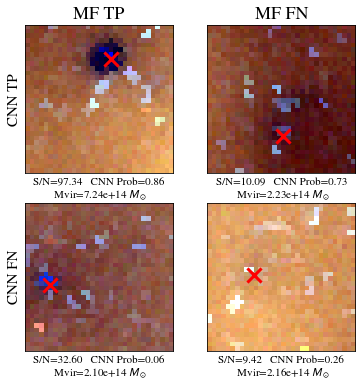

In [25]:
reload(utils)
df = pd.read_pickle(sgs.CACHE_FULLDF_DIST2EDGE_CAL)
df = df[df['which'] == 'test'].rename(columns={'map_ra': 'cutout_ra', 'map_dec': 'cutout_dec', 'StoN':'pred_MF'}).reset_index()

rows = {"MF TP & CNN FN": df[df['cutout_id'] == 101729].iloc[0],
           "MF FN & CNN TP": df[df['cutout_id'] == 4914].iloc[0],
           "MF FN & CNN FN": df[df['cutout_id'] == 65748].iloc[0],
           "MF TP & CNN TP": df[df['cutout_id'] == 58596].iloc[0]
          }
if get_x_func_skymap is not None:
    utils.show_false_color_2x2(rows, get_x_func_skymap, 
                               #save_path='../paper/pics/false_color_complementary_calibrate.pdf', 
                               font=15) 

## Completeness Curves

<AxesSubplot:>

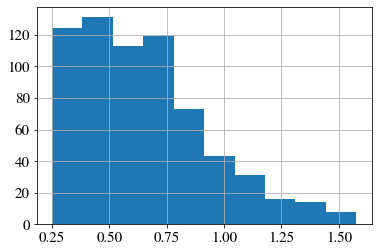

In [26]:
df = utils.make_full_testdf(True)
df[FULL_idxmaps['CNN FN']].sort_values('Mvir', ascending=False)['redshift'].hist()

<AxesSubplot:>

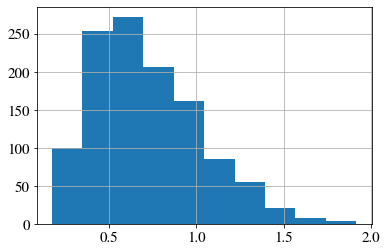

In [27]:
df[FULL_idxmaps['CNN TP']].sort_values('Mvir', ascending=False)['redshift'].hist()

[3.09487300e+13 3.78953550e+13 4.64011910e+13 5.68162121e+13
 6.95689460e+13 8.51841064e+13 1.04304182e+14 1.27715870e+14
 1.56382451e+14 1.91483415e+14 2.34462997e+14 2.87089599e+14
 3.51528553e+14 4.30431211e+14 5.27044035e+14 6.45342178e+14
 7.90193037e+14 9.67556526e+14 1.18473030e+15 1.45065000e+15]
Completeness (Re call) vs Mass


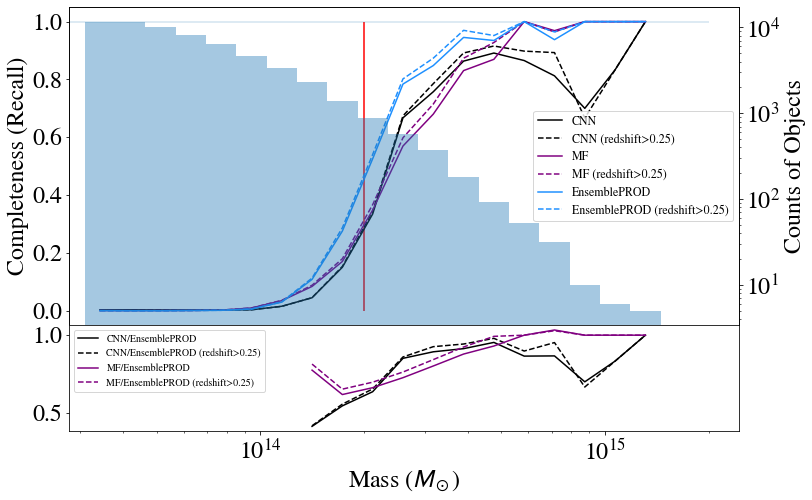

In [28]:
reload(utils)
#Original#
df = utils.make_full_testdf(True)
curves = utils.plot_completeness(df, 
                        #save_path='../paper/pics/completeness_cumu_Mvir_calibrate.pdf',
                       )
#curves

In [29]:
curves

{'CNN': 3.094873e+13    0.002910
 3.789536e+13    0.003058
 4.640119e+13    0.002665
 5.681621e+13    0.002586
 6.956895e+13    0.002967
 8.518411e+13    0.003226
 1.043042e+14    0.015467
 1.277159e+14    0.044802
 1.563825e+14    0.150215
 1.914834e+14    0.334471
 2.344630e+14    0.667247
 2.870896e+14    0.757333
 3.515286e+14    0.863388
 4.304312e+14    0.891304
 5.270440e+14    0.865385
 6.453422e+14    0.812500
 7.901930e+14    0.700000
 9.675565e+14    0.833333
 1.184730e+15    1.000000
 dtype: float64,
 'MF': 3.094873e+13    0.000514
 3.789536e+13    0.000262
 4.640119e+13    0.000493
 5.681621e+13    0.000862
 6.956895e+13    0.002030
 8.518411e+13    0.009462
 1.043042e+14    0.034801
 1.277159e+14    0.083950
 1.563825e+14    0.170243
 1.914834e+14    0.348123
 2.344630e+14    0.569686
 2.870896e+14    0.680000
 3.515286e+14    0.830601
 4.304312e+14    0.869565
 5.270440e+14    1.000000
 6.453422e+14    0.968750
 7.901930e+14    1.000000
 9.675565e+14    1.000000
 1.18473

[0.0417 0.1403 0.2389 0.3375 0.4361 0.5347 0.6333 0.7319 0.8305 0.9291
 1.0277 1.1263 1.2249 1.3235 1.4221 1.5207 1.6193 1.7179 1.8165 1.9151]
Completeness (Re call) vs Redshift


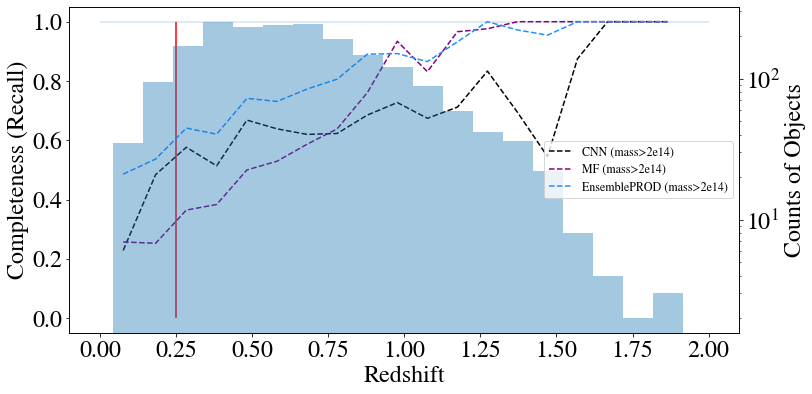

{'CNN': 0.0417    0.228571
 0.1403    0.484211
 0.2389    0.576471
 0.3375    0.513834
 0.4361    0.668103
 0.5347    0.638655
 0.6333    0.619835
 0.7319    0.623037
 0.8305    0.684932
 0.9291    0.727273
 1.0277    0.674157
 1.1263    0.711864
 1.2249    0.833333
 1.3235    0.694444
 1.4221    0.545455
 1.5207    0.875000
 1.6193    1.000000
 1.7179    1.000000
 1.8165    1.000000
 dtype: float64,
 'MF': 0.0417    0.257143
 0.1403    0.252632
 0.2389    0.364706
 0.3375    0.383399
 0.4361    0.500000
 0.5347    0.529412
 0.6333    0.586777
 0.7319    0.638743
 0.8305    0.760274
 0.9291    0.933884
 1.0277    0.831461
 1.1263    0.966102
 1.2249    0.976190
 1.3235    1.000000
 1.4221    1.000000
 1.5207    1.000000
 1.6193    1.000000
 1.7179    1.000000
 1.8165    1.000000
 dtype: float64,
 'EnsemblePROD': 0.0417    0.485714
 0.1403    0.536842
 0.2389    0.641176
 0.3375    0.620553
 0.4361    0.741379
 0.5347    0.731092
 0.6333    0.772727
 0.7319    0.806283
 0.8305    0.8904

In [30]:

reload(utils)
utils.plot_completeness(df[df['Mvir']>2e14], col='redshift', q0=0., q1=1., 
                       #save_path='../paper/pics/completeness_cumu_redshift_calibrate.pdf',
                       )